In [40]:
import numpy as np
from tensorflow.keras import layers, models
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import classification_report
import os
import cv2
import random
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn import metrics

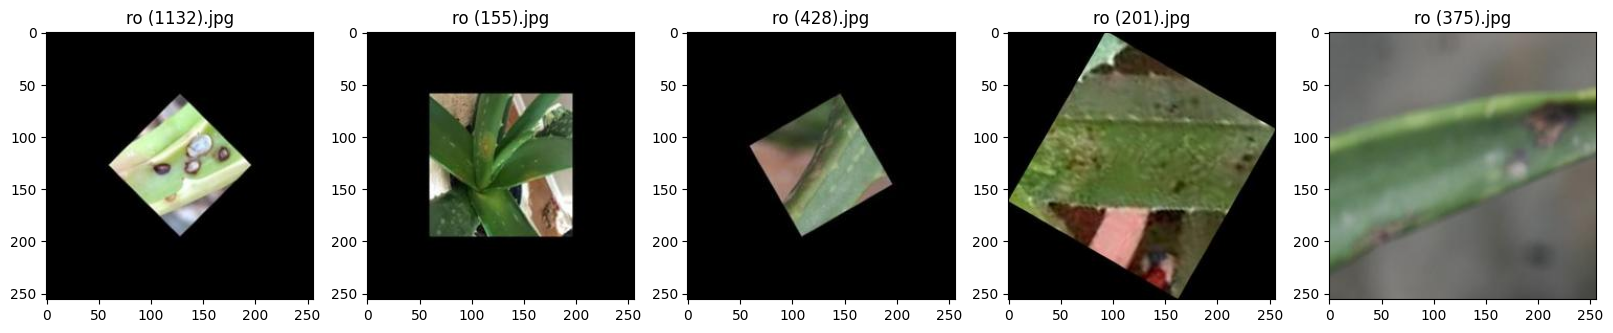

In [41]:
plt.figure(figsize=(20,20))
test_folder=r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\data\train\0'
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [42]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\data\train'

In [43]:
classes = ["Infected","Healthy"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [44]:
def create_dataset(img_folder):
    img_data_array=[]
    class_name=[]
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name

In [45]:
X_train, y_train =create_dataset(r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\data\train')
X_test, y_test =create_dataset(r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\data\test')
X_val, y_val =create_dataset(r'C:\Users\adith\Documents\Aloe_Vara_leaf_classification\data\val')

In [46]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train = y_train.reshape(-1,)
y_train = y_train.astype(np.int64)

In [47]:
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = y_test.reshape(-1,)
y_test = y_test.astype(np.int64)
X_train = X_train / 255.0

In [48]:
X_val = np.array(X_val)
y_val = np.array(y_val)
y_val = y_val.reshape(-1,)
y_val = y_val.astype(np.int64)
X_val = X_val / 255.0

In [49]:
# #This is the best model we found. For additional models, check out I_notebook.ipynb
# num_classes=[0,1]
# import datetime
# import time
# import keras
# from keras.layers import Dropout, Flatten, Dense 
# from keras.models import Sequential 
# start = datetime.datetime.now()
# model = Sequential() 
# model.add(Flatten(input_shape=X_train.shape[1:])) 
# model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
# model.add(Dropout(0.5)) 
# model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
# model.add(Dropout(0.3))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [50]:
# # history = model.fit(np.array(train_data), np.array(train_labels), epochs=7,batch_size=batch_size, validation_data=(np.array(validation_data), np.array(validation_labels)))
# history = model.fit(X_train, y_train, epochs=25,batch_size=32, validation_data=(X_val, y_val))
# model.save_weights(top_model_weights_path)

In [51]:
# #Graphing our training and validation
# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))
# plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.ylabel('accuracy') 
# plt.xlabel('epoch')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.ylabel('loss') 
# plt.xlabel('epoch')
# plt.legend()
# plt.show()

In [52]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [53]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:
history=cnn.fit(X_train, y_train, epochs=25)

Epoch 1/25
27/27 [==============================] - 11s 346ms/step - loss: 0.9287 - accuracy: 0.5119
Epoch 2/25
27/27 [==============================] - 8s 284ms/step - loss: 0.7191 - accuracy: 0.5166
Epoch 3/25
27/27 [==============================] - 7s 273ms/step - loss: 0.6967 - accuracy: 0.5439
Epoch 4/25
27/27 [==============================] - 8s 281ms/step - loss: 0.6044 - accuracy: 0.6580
Epoch 5/25
27/27 [==============================] - 8s 287ms/step - loss: 0.5239 - accuracy: 0.7280
Epoch 6/25
27/27 [==============================] - 8s 291ms/step - loss: 0.4684 - accuracy: 0.7957
Epoch 7/25
27/27 [==============================] - 8s 284ms/step - loss: 0.3154 - accuracy: 0.8990
Epoch 8/25
27/27 [==============================] - 8s 280ms/step - loss: 0.2416 - accuracy: 0.9216
Epoch 9/25
27/27 [==============================] - 8s 298ms/step - loss: 0.1725 - accuracy: 0.9525
Epoch 10/25
27/27 [==============================] - 7s 267ms/step - loss: 0.1948 - accuracy: 0.950

In [16]:
cnn.evaluate(X_train, y_train)
y_pred = cnn.predict(X_train)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)

27/27 [==============================] - 3s 91ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

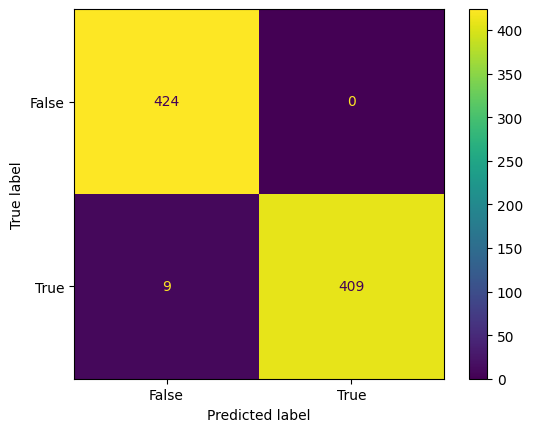

In [17]:
confusion_matrix = metrics.confusion_matrix(y_train, y_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [18]:
cnn.evaluate(X_test,y_test)

y_pred = cnn.predict(X_test)
print(y_pred[:5])
y_classes = [np.argmax(element) for element in y_pred]

4/4 [==============================] - 0s 96ms/step
[[0.99999994 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.99999994 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.99999994 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.99999994 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.99999994 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


              precision    recall  f1-score   support

        Rust       0.98      0.91      0.94        53
     Healthy       0.91      0.98      0.95        53

    accuracy                           0.94       106
   macro avg       0.95      0.94      0.94       106
weighted avg       0.95      0.94      0.94       106



NameError: name 'accuracy_score' is not defined

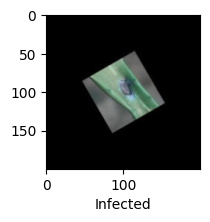

In [19]:
plot_sample(X_test, y_test,43)
pred_classes = ["Rust","Healthy"]
print(classification_report(y_test, y_classes, target_names=pred_classes))
print("Accuracy:",accuracy_score(y_classes,y_test))

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()